In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 24.8 MB 2.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2022-01-05 05:59:05--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  1.29MB/s    in 0.2s    

2022-01-05 05:59:06 (1.29 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [5]:
df = pd.read_csv('SPY.csv', index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [6]:
# Naive prediction predicts 
# Shifting down the row on ClosePrediction by one row

df["ClosePrediction"] = df["Close"].shift(1)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [8]:
# Assigning true values and predicted values so we can
# test the metrics function

y_true = df.iloc[1:]["Close"]
y_pred = df.iloc[1:]["ClosePrediction"]

## Metrics

Find out how the relations between values. Determine what is good or bad values.

In [9]:
# Sum of Squared Errors (SSE)
# There's no function for it so we made it

(y_true - y_pred).dot(y_true - y_pred)

6330.37428949261

In [10]:
# MSE

mean_squared_error(y_true, y_pred)

2.7985739564511984

In [11]:
# MSE again without sklearn functions

(y_true - y_pred).dot(y_true - y_pred)/len(y_true)

2.798573956451198

In [12]:
# RMSE
# If squared = True returns MSE value, if False returns RMSE value.

mean_squared_error(y_true, y_pred, squared=False)

1.6728938867875627

In [13]:
# RMSE again without sklearn functions

np.sqrt((y_true - y_pred).dot(y_true - y_pred)/len(y_true))

1.6728938867875625

In [14]:
# MAE

mean_absolute_error(y_true, y_pred)

1.1457559803120336

In [15]:
# R^2
# Does not depend on the scale of the data

r2_score(y_true, y_pred)

0.9989603259063914

In [16]:
# MAPE
# Also does not depend on the scale of the data

mean_absolute_percentage_error(y_true, y_pred)

0.006494073151422375

### sMAPE

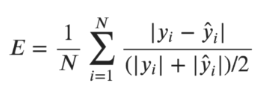

In [17]:
# There's no function available for sMAPE
# So we made it on our own

def smape(y_true, y_pred):
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred))/2
  ratio = numerator/denominator
  return ratio.mean()

smape(y_true, y_pred)

0.006491365814068423